### 영화 평점 시각화
- 영화 평점정보를 크롤링해서 평점의 변화에 대한 분석을 시각화 진행
    - 영화 평점 정보 수집 (네이버 영화)
    - 정형데이터로 정리
    - 평점을 이용한 시각화

In [14]:
# 필요 패키지 import
from urllib.request import urlopen # 통신 모듈
from bs4 import BeautifulSoup # 파싱객체 모듈
import pandas as pd
import numpy as np
from urllib.parse import urljoin, quote
import urllib
from tqdm import tqdm_notebook # 작업 진행 정도를 확인하는 패키지




In [ ]:
# %pip install tqdm

In [ ]:
# https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20221124
# https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20221122


In [15]:
# URL 생성
url_base = 'https://movie.naver.com/'
url_sub = '/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20221124'
url = url_base + url_sub

url

'https://movie.naver.com//movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20221124'

In [16]:
# 두 개 이상의 url을 결합할 때는 문자열 연결을 하지말고 urljoin()을 이용
# 형식을 체크할 것

url = urljoin(url_base, url_sub)
url

'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20221124'

In [17]:
# 페이지 요청
html = urlopen(url)

# 파싱객체 생성
soup = BeautifulSoup(html, 'html.parser')


In [18]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;tg=0&amp;date=20221124" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article

In [19]:
# 특정일의 영화 랭킹 (평점순) 페이지에서 1위부터 최대랭킹 순위까지 영화 title 추출
soup.findAll('div', {'class', 'tit5'})
len(soup.findAll('div', {'class', 'tit5'}))
soup.findAll('div', {'class', 'tit5'})[0].text.replace('\n','')

# div 태그 내부의 a 태그로 접근해서 text 추출
soup.findAll('div', {'class', 'tit5'})[0].a['href']
soup.findAll('div', {'class', 'tit5'})[0].a.text

'탑건: 매버릭'

In [20]:
# list 내포 for문을 활용한 영화 타이틀 추출
movie_name = [s.a.text for s in soup.findAll('div', {'class','tit5'})]
movie_name


['탑건: 매버릭',
 '살인의 추억',
 '올빼미',
 '씽2게더',
 '시네마 천국',
 '극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교',
 '극장판 주술회전 0',
 '인생은 아름다워',
 '코다',
 '증인',
 '비긴 어게인',
 '타오르는 여인의 초상',
 '변호인',
 '매드맥스: 분노의 도로',
 '너의 이름은.',
 '아멜리에',
 '벌새',
 '헤어질 결심',
 '라라랜드',
 '육사오(6/45)',
 '아무르',
 '자백',
 '그녀',
 '공조2: 인터내셔날',
 '폴: 600미터',
 '러스트 앤 본',
 '초속5센티미터',
 '다가오는 것들',
 '그래비티',
 '큐어',
 '에브리씽 에브리웨어 올 앳 원스',
 '언어의 정원',
 '리멤버',
 '티켓 투 파라다이스',
 '혼자 사는 사람들',
 '데시벨',
 '춘몽',
 '라붐',
 '사랑할 땐 누구나 최악이 된다',
 '블랙 아담',
 '밤은 짧아 걸어 아가씨야',
 '썸머 필름을 타고!',
 '홀리 모터스',
 '아네트',
 '아워 바디',
 '오펀: 천사의 탄생',
 '블랙 팬서: 와칸다 포에버',
 '대무가',
 '동감',
 '정직한 후보2']

In [21]:
# 특정일의 영화 평점 추출
soup.findAll('td', {'class':'point'})
len(soup.findAll('td',{'class':'point'}))
soup.findAll('td',{'class':'point'})[0].text

'9.76'

In [22]:
movie_point = [s.text for s in soup.findAll('td', {'class':'point'})]
movie_point

['9.76',
 '9.41',
 '9.39',
 '9.38',
 '9.33',
 '9.32',
 '9.24',
 '9.23',
 '9.13',
 '9.10',
 '9.04',
 '9.04',
 '9.00',
 '8.81',
 '8.81',
 '8.80',
 '8.74',
 '8.68',
 '8.62',
 '8.58',
 '8.52',
 '8.52',
 '8.51',
 '8.50',
 '8.44',
 '8.38',
 '8.36',
 '8.34',
 '8.31',
 '8.30',
 '8.29',
 '8.17',
 '8.16',
 '8.09',
 '8.07',
 '8.04',
 '7.95',
 '7.91',
 '7.74',
 '7.59',
 '7.56',
 '7.56',
 '7.48',
 '7.23',
 '6.58',
 '6.46',
 '6.31',
 '6.25',
 '6.22',
 '6.00']

In [23]:
# 위 코드 결합 (요청부터 추출까지)
# url 생성

url_base = 'https://movie.naver.com/'
url_sub = '/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date={date}'
url = urljoin(url_base, url_sub)  

# 페이지 요청
html = urlopen(url)

# 파싱 객체 생성
soup = BeautifulSoup(html, 'html.parser')

movie_name = [s.a.text for s in soup.findAll('div', {'class', 'tit5'})]
movie_point = [s.text for s in soup.findAll('td', {'class':'point'})]

### 영화 정보를 수집할 기간 설정
- 기간데이터 생성
- 위 코드 함수로 구성 (날짜별 함수를 호출해서 데이터 수집)

- 날짜 데이터 생성
    - pd.date_range('시작일', periods=생성날짜수, freq=생성간격(D : 하루간격))

In [24]:
date = pd.date_range('20220701', periods=100, freq='D')
date
date[17]

Timestamp('2022-07-18 00:00:00', freq='D')

In [25]:
# 날짜 형식 변경(yyyymmdd) :
# 생성한 형식은 2022-07-18 00:00:00이므로 변경 필요
# strftime(형식문자)

today = date[17]
today.strftime('%Y%m%d')

# %Y : 4자리 연도
# %m : 2자리 월
# %d : 2자리 일


'20220718'

In [26]:
url.format(date=quote(today.strftime('%Y%m%d')))

'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20220718'

In [27]:
# quote() : 한글은 조합문자이므로 한글자가 2byte임
# 통신에서 전송될 때는 1byte씩 전송되어야 함
quote('강남역')
quote('20220107') # 숫자는 한바이트씩 처리되므로 quote 함수의 결과가 달라지지 않음


'20220107'

In [28]:
for d in date[0:3]:
    today = d
    print(url.format(date=quote(today.strftime('%Y%m%d'))))

https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20220701
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20220702
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20220703


### 함수 구성
- 특정 날짜를 파라미터로 전달받아서 영화명과 평점을 추출한 후 데이터프레임으로 반환하는 함수
- get_movie(date) :
    - date인수를 사용해 url 설정
    - date별로 영화정보(title, point)를 반환

In [29]:
def get_movie(date):
    
    # url 생성
    url_base = 'https://movie.naver.com/'
    url_sub = '/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date={date}'
    
    # 문자열에 {변수명}을 사용하면 {}내부의 문자는 변수로 사용됨
    url = urljoin(url_base, url_sub)  

    today = date
    url_fin = url.format(date=quote(today.strftime('%Y%m%d')))

    # 페이지 요청
    html = urlopen(url_fin)

    # 파싱 객체 생성
    soup = BeautifulSoup(html, 'html.parser')

    # 랭킹 날짜 생성
    movie_date = today

    # 영화 제목 추출
    movie_name = [s.a.text for s in soup.findAll('div', {'class', 'tit5'})]
    
    # 영화 평점 추출
    movie_point = [s.text for s in soup.findAll('td', {'class':'point'})]

    # 데이터프레임으로 반환
    return pd.DataFrame({'날짜': movie_date,
                        '영화제목': movie_name,
                        '영화평점': movie_point})

In [30]:
# 20220718일 영화 데이터 추출
get_movie(date[17])

,날짜,영화제목,영화평점
0,2022-07-18,탑건: 매버릭,9.78
1,2022-07-18,명탐정 코난: 할로윈의 신부,9.55
2,2022-07-18,범죄도시2,9.44
3,2022-07-18,극장판 주술회전 0,9.24
4,2022-07-18,위대한 침묵,9.13
5,2022-07-18,코다,9.12
6,2022-07-18,카시오페아,9.08
7,2022-07-18,올드보이,9.04
8,2022-07-18,남매의 여름밤,8.96
9,2022-07-18,디어 헌터,8.93


In [31]:
# 설정기간동안의 모든 영화정보 추출

# 빈데이터프레임을 생성해서 반환되는 데이터프레임을 concat해서 df 누적
movie_df = pd.DataFrame()

#tqdm 사용해서 진행상태 확인
for today in tqdm_notebook(date):
    movie_df = pd.concat([movie_df, get_movie(today)],
        axis = 0, ignore_index = True)

C:\Users\82102\AppData\Local\Temp\ipykernel_14276\3022709876.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(date):


  0%|          | 0/100 [00:00<?, ?it/s]

In [32]:
movie_df.head()
movie_df.tail()

movie_df.shape

(3925, 3)

In [33]:
movie_df.to_csv('./naver_movie_ranking.csv')

## 시각화 작업
- 영화별 평점의 합계를 계산 (평점의 합이 높은 영화를 추출)
    - 추출된 영화에 대해서 평점의 추이를 확인할 수 있는 그래프 작성

In [34]:
# 데이터 특성 확인
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3925 non-null   datetime64[ns]
 1   영화제목    3925 non-null   object        
 2   영화평점    3925 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 92.1+ KB


In [35]:
# 영화평점의 Dtype은 object (문자열)
# 그래프 작업과 합계를 계산해야 하므로 수치형태로 변화 : astype(데이터타입)

movie_df['영화평점'] = movie_df['영화평점'].astype(float)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3925 non-null   datetime64[ns]
 1   영화제목    3925 non-null   object        
 2   영화평점    3925 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 92.1+ KB


In [36]:
# 영화별 point의 합 : pivot_table(data_set, index=[기준열], aggfunc=계산함수)
movie_unique = pd.pivot_table(movie_df, index = ['영화제목'], aggfunc = np.sum)

In [38]:
movie_unique.head()
movie_unique.tail()

,영화평점
영화제목,
혼자 사는 사람들,120.97
홀리 모터스,305.85
화양연화,325.90
황혼에서 새벽까지,153.52
후 아 유,96.14


In [39]:
# 영화 평점의 합이 높은 순으로 정렬
movie_top = movie_unique.sort_values(by='영화평점', ascending=False)
movie_top.head(50)

,영화평점
영화제목,
탑건: 매버릭,977.60
극장판 주술회전 0,923.99
헤어질 결심,865.52
중경삼림,862.59
애프터 양,816.54
명탐정 코난: 할로윈의 신부,816.01
코다,812.04
큐어,749.74
범죄도시2,704.29


In [41]:
# 탑건: 매버릭 영화에 대한 평점 변화 그래프 시각화
# 탑건: 매버릭 레코드 추출
# df.query(조건)
tmp = movie_df.query('영화제목 == ["탑건: 매버릭"]')
tmp

,날짜,영화제목,영화평점
0,2022-07-01,탑건: 매버릭,9.80
41,2022-07-02,탑건: 매버릭,9.80
80,2022-07-03,탑건: 매버릭,9.80
115,2022-07-04,탑건: 매버릭,9.79
152,2022-07-05,탑건: 매버릭,9.79
...,...,...,...
3677,2022-10-04,탑건: 매버릭,9.77
3727,2022-10-05,탑건: 매버릭,9.77
3777,2022-10-06,탑건: 매버릭,9.77
3827,2022-10-07,탑건: 매버릭,9.77


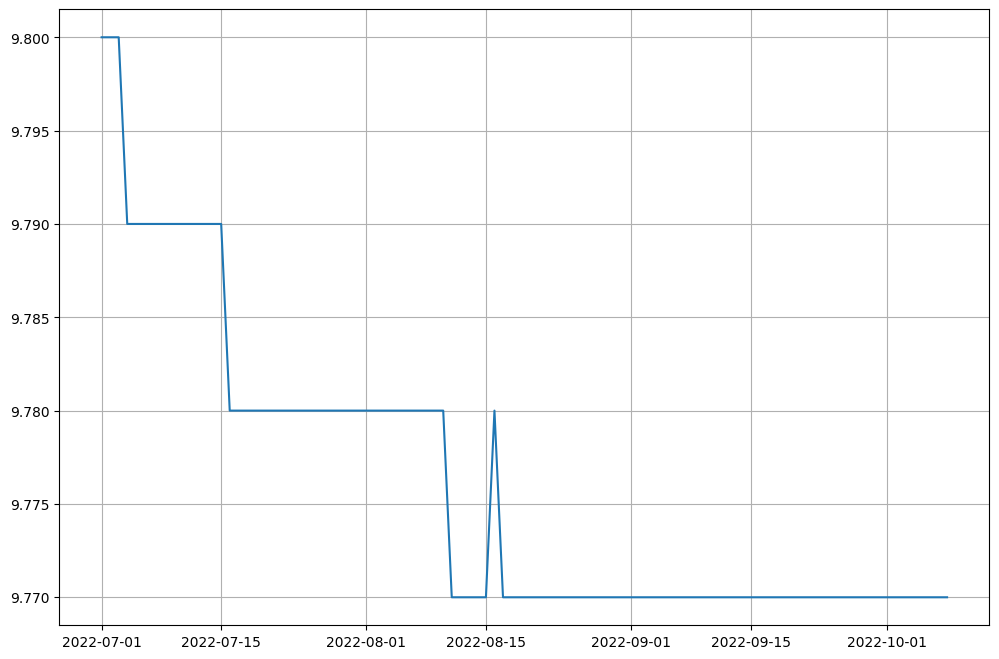

In [42]:
# 평점 변화 그래프
# 시계열 데이터이므로 line 그래프

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(tmp['날짜'], tmp['영화평점'])
plt.grid()
plt.show()

In [43]:
movie_df

,날짜,영화제목,영화평점
0,2022-07-01,탑건: 매버릭,9.80
1,2022-07-01,범죄도시2,9.46
2,2022-07-01,언터처블: 1%의 우정,9.33
3,2022-07-01,로마의 휴일,9.26
4,2022-07-01,극장판 주술회전 0,9.25
...,...,...,...
3920,2022-10-08,그린 나이트,7.23
3921,2022-10-08,놉,6.77
3922,2022-10-08,정직한 후보2,5.86
3923,2022-10-08,브로커,5.54


In [44]:
# 데이터 재배치 - long-wide
# 날짜별 영화의 point를 확인하기 위해 재구성
# pivot_table 이용
# index = 날짜, column=영화제목
movie_wide = pd.pivot_table(movie_df,
                    index=['날짜'],
                    columns=['영화제목'],
                    values=['영화평점'])

In [45]:
movie_wide.shape

(100, 164)

In [46]:
movie_wide.head()
movie_wide.tail()

영화평점                                                             \
영화제목       1917 DC 리그 오브 슈퍼-펫 가버나움 걸어도 걸어도 고스트 스토리 고양이를 부탁해  공조 공조2: 인터내셔날   
날짜                                                                           
2022-10-04  NaN           NaN  NaN     NaN     NaN      NaN NaN       8.63   
2022-10-05  NaN          7.79  NaN     NaN     NaN      NaN NaN       8.62   
2022-10-06  NaN           NaN  NaN     NaN     NaN      NaN NaN       8.62   
2022-10-07  NaN           NaN  NaN     NaN     NaN      NaN NaN       8.62   
2022-10-08  NaN           NaN  NaN     NaN     NaN      NaN NaN       8.62   

                              ...                                          \
영화제목       광대: 소리꾼 군도:민란의 시대  ... 해운대 해피 투게더    헌트 헤어질 결심 헤이트풀8 혼자 사는 사람들   
날짜                            ...                                           
2022-10-04     NaN       NaN  ... NaN   9.18  8.39   8.68   NaN       NaN   
2022-10-05     NaN       NaN  ... NaN   9.18  8.39   8.68   NaN       NaN   
2022-10-06     NaN       NaN  ... NaN   9.18  8.39   8.68   NaN       NaN   
2022-10-07     NaN       NaN  ... NaN   9.18  8.39   8.68   NaN       NaN   
2022-10-08     NaN       NaN  ... NaN   9.18  8.39   8.68   NaN       NaN   

                                         
영화제목       홀리 모터스  화양연화 황혼에서 새벽까지 후 아 유  
날짜                                       
2022-10-04    NaN  8.81       NaN   NaN  
2022-10-05    NaN  8.81       NaN   NaN  
2022-10-06    NaN  8.81       NaN   NaN  
2022-10-07    NaN  8.81       NaN   NaN  
2022-10-08    NaN  8.81       NaN   NaN  

[5 rows x 164 columns]

In [47]:
# 피봇테이블 구성중에 멀티인덱스로 구성되었음
# 최상위인덱스 (영화평점)이 불필요하므로 제거
# 멀티인덱스 제거
# df.columns.droplevel()
movie_wide.columns = movie_wide.columns.droplevel()

In [48]:
movie_wide

영화제목,1917,DC 리그 오브 슈퍼-펫,가버나움,걸어도 걸어도,고스트 스토리,고양이를 부탁해,공조,공조2: 인터내셔날,광대: 소리꾼,군도:민란의 시대,...,해운대,해피 투게더,헌트,헤어질 결심,헤이트풀8,혼자 사는 사람들,홀리 모터스,화양연화,황혼에서 새벽까지,후 아 유
날짜,,,,,,,,,,,,,,,,,,,,,
2022-07-01,NaN,NaN,NaN,8.63,7.63,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.46,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-02,NaN,NaN,NaN,8.62,7.63,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.46,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-03,NaN,NaN,NaN,8.62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.49,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-04,NaN,NaN,NaN,8.62,NaN,NaN,NaN,NaN,NaN,NaN,...,7.44,NaN,NaN,8.50,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-05,NaN,NaN,NaN,8.62,NaN,NaN,NaN,NaN,NaN,NaN,...,7.44,NaN,NaN,8.53,NaN,NaN,7.45,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.63,NaN,NaN,...,NaN,9.18,8.39,8.68,NaN,NaN,NaN,8.81,NaN,NaN
2022-10-05,NaN,7.79,NaN,NaN,NaN,NaN,NaN,8.62,NaN,NaN,...,NaN,9.18,8.39,8.68,NaN,NaN,NaN,8.81,NaN,NaN
2022-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.62,NaN,NaN,...,NaN,9.18,8.39,8.68,NaN,NaN,NaN,8.81,NaN,NaN


In [49]:
movie_top.head(5)

,영화평점
영화제목,
탑건: 매버릭,977.60
극장판 주술회전 0,923.99
헤어질 결심,865.52
중경삼림,862.59
애프터 양,816.54


In [51]:
sel_col = movie_top.head(5).index
sel_col

Index(['탑건: 매버릭', '극장판 주술회전 0', '헤어질 결심', '중경삼림', '애프터 양'], dtype='object', name='영화제목')

In [52]:
## 그래프 한글 처리하는 코드

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [53]:
movie_wide[sel_col]

영화제목,탑건: 매버릭,극장판 주술회전 0,헤어질 결심,중경삼림,애프터 양
날짜,,,,,
2022-07-01,9.80,9.25,8.46,8.90,8.09
2022-07-02,9.80,9.25,8.46,8.90,8.09
2022-07-03,9.80,9.24,8.49,8.90,8.08
2022-07-04,9.79,9.24,8.50,8.90,8.08
2022-07-05,9.79,9.24,8.53,8.90,8.08
...,...,...,...,...,...
2022-10-04,9.77,9.23,8.68,8.89,8.19
2022-10-05,9.77,9.23,8.68,8.89,8.19
2022-10-06,9.77,9.23,8.68,8.89,8.19


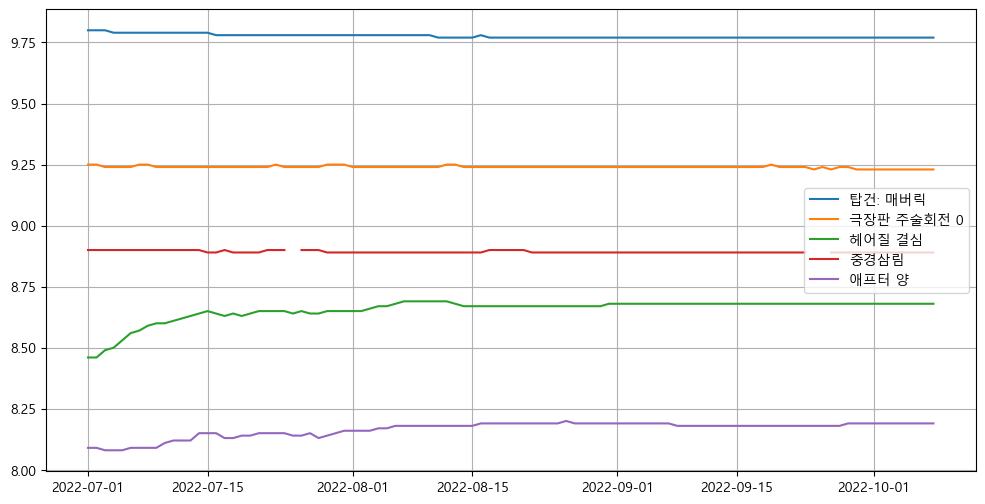

In [54]:
# 평점의 합이 높은 5개 영화의 평점 변화 그래프 시각화

plt.figure(figsize=(12,6))
plt.plot(movie_wide[sel_col])
plt.legend(sel_col, loc='best')
plt.grid()
plt.show()